<a href="https://www.kaggle.com/code/rkmaurya93/scaling?scriptVersionId=256322954" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/kaggle/input/social-network-ads/Social_Network_Ads.csv')

In [3]:
df=df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

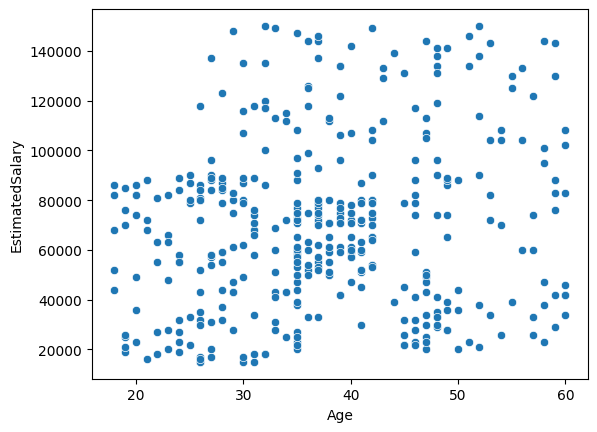

In [5]:
sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,1])

In [6]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [8]:
import tensorflow as tf
from tensorflow import keras 
from keras import Sequential
from keras.layers import Dense

2025-08-16 15:09:29.265754: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755356969.582268      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755356969.696727      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [9]:
model=Sequential()

In [10]:
model.add(Dense(128,activation='relu',input_shape=(2,)))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-16 15:09:46.565677: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [13]:
history=model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.3327 - loss: 3954.9587 - val_accuracy: 0.2750 - val_loss: 180.9572
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4922 - loss: 557.0895 - val_accuracy: 0.7250 - val_loss: 438.5862
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5106 - loss: 475.0423 - val_accuracy: 0.2750 - val_loss: 575.8350
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4740 - loss: 295.0561 - val_accuracy: 0.7250 - val_loss: 267.8410
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5659 - loss: 224.5218 - val_accuracy: 0.2750 - val_loss: 171.9043
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5131 - loss: 103.1446 - val_accuracy: 0.2750 - val_loss: 150.3966
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4652 - loss: 97.0534 - val_accuracy: 0.2750 - val_loss: 101.4146
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5617 - los

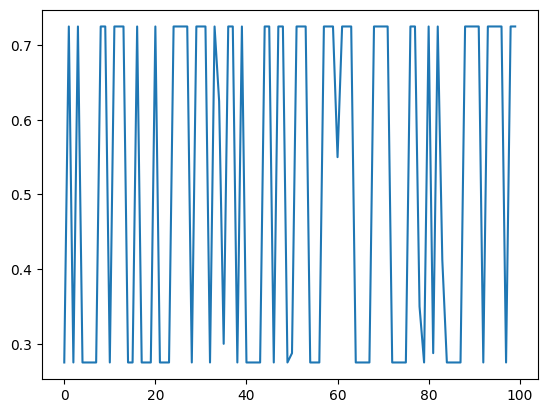

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

# Applying Scaling:

In [15]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [16]:
x_train_scaled=scalar.fit_transform(x_train)
x_test_scaled=scalar.transform(x_test)


In [17]:
model=Sequential()

In [18]:
model.add(Dense(units=128, activation='relu', input_shape=(2,)))
model.add(Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
history=model.fit(x_train_scaled,y_train,epochs=100,validation_data=(x_test_scaled,y_test))

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.6244 - loss: 0.6666 - val_accuracy: 0.8625 - val_loss: 0.6103
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7814 - loss: 0.6079 - val_accuracy: 0.8625 - val_loss: 0.5468
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8101 - loss: 0.5603 - val_accuracy: 0.8875 - val_loss: 0.4910
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8431 - loss: 0.5197 - val_accuracy: 0.8875 - val_loss: 0.4443
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8282 - loss: 0.4822 - val_accuracy: 0.8875 - val_loss: 0.4041
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8497 - loss: 0.4646 - val_accuracy: 0.9000 - val_loss: 0.3692
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8414 - loss: 0.4339 - val_accuracy: 0.9000 - val_loss: 0.3395
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8576 - loss: 0.4077 - val_accuracy: 0.

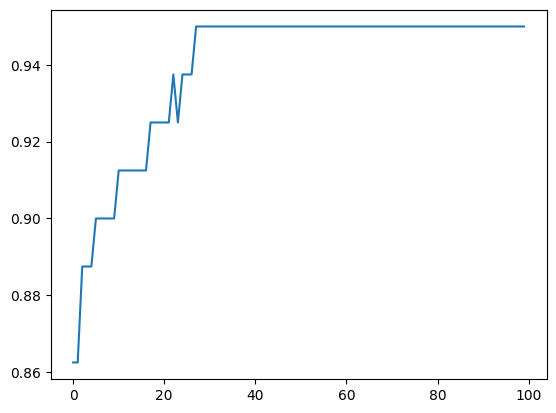

In [22]:
plt.plot(history.history['val_accuracy'])